In [1]:
import rebound as rb
import numpy as np

In [2]:
from celmech.nbody_simulation_utilities import set_time_step, get_simarchive_integration_results

In [3]:
sim = rb.Simulation()
sim.units = ('years','AU','Msun')
sim.add(m=1)
sim.add(m=5.15e-5,a = 30) # Neptune
a = 200. # test particle semi-major axis
q = 35. # test particle pericenter distance
e = 1-q/a
sim.add(m=0,a=a,e=e) 
sim.move_to_com()
sim.integrator='whfast'
set_time_step(sim,1/25.)

In [4]:
sim.automateSimulationArchive("comet.sa",step=int(1_000/sim.dt),deletefile=True)

sim.integrate(10_000_000)

In [5]:
results = get_simarchive_integration_results("comet.sa")

/Users/shadden/anaconda/envs/celmech/lib/python3.9/site-packages/rebound/simulation.py:1987: FutureWarning: sim.calculate_energy() is deprecated and will be removed in the future. Use sim.energy() instead
  warnings.warn( "sim.calculate_energy() is deprecated and will be removed in the future. Use sim.energy() instead", FutureWarning)


In [6]:
from matplotlib import pyplot as plt

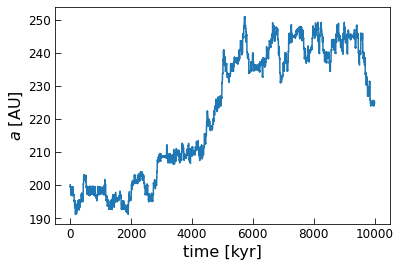

In [7]:
plt.plot(results['time']/1_000,results['a'][1])
plt.xlabel("time [kyr]",fontsize=16)
plt.ylabel(r"$a$ [AU]",fontsize=16)
plt.tick_params(direction='in',labelsize=12,size=6)

# variationals

In [8]:
sa = rb.SimulationArchive('comet.sa')

In [9]:
sim0 = sa[0]

In [10]:
sim = sim0.copy()

In [16]:
vs = []

v = sim.add_variation(order=1)
v.particles[2].x = 1
vs.append(v)

v = sim.add_variation(order=1)
v.particles[2].y = 1
vs.append(v)

v = sim.add_variation(order=1)
v.particles[2].vx = 1
vs.append(v)

v = sim.add_variation(order=1)
v.particles[2].vy = 1
vs.append(v)

In [18]:
sim.integrate(100)

In [22]:
Dr,Dv = np.array([v.particles[2].xyz[:2] for v in vs]),np.array([v.particles[2].vxyz[:2] for v in vs])

In [24]:
np.linalg.det(np.hstack((Dr,Dv)))

1.0000000000000027